In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df  = pd.read_csv("/data/project/thymelab/october_2024_hcrtr2_discovery_results/old_antagonist_data_to_keep/all_antagonist_data.csv")

In [4]:
#this crashes with how big the dataframe is with the open options
df

,file,ddg,total_motifs,significant_motifs,real_motif_ratio,hbond_motif_count,hbond_motif_energy_sum,closest_autodock_recovery_rmsd,closest_autodock_recovery_ddg,strain_energy,total
0,/scratch/abgvg9/discovery_results/antagonists/0/placements/7l1u_receptor_only.pdb,0.000000,0.0,0.0,0.000000,0,0.000000,100,0,0,100.000000
1,/scratch/abgvg9/discovery_results/antagonists/10000/placements/4s0v_receptor_only_PV-005593546679_4_11.pdb,-9.861034,7.0,2.0,0.142857,1,-0.258671,100,0,0,100.023152
2,/scratch/abgvg9/discovery_results/antagonists/10000/placements/4s0v_receptor_only_PV-005593443896_6_0.pdb,-9.037033,6.0,2.0,0.166667,1,-0.223285,100,0,0,99.906349
3,/scratch/abgvg9/discovery_results/antagonists/10000/placements/4s0v_receptor_only_PV-005593387485_3_3.pdb,-12.278551,8.0,5.0,0.125000,1,-0.540236,100,0,0,101.306213
4,/scratch/abgvg9/discovery_results/antagonists/10000/placements/4s0v_receptor_only_PV-005593656674_1_0.pdb,-10.394492,11.0,3.0,0.090909,0,0.000000,100,0,0,103.696417
...,...,...,...,...,...,...,...,...,...,...,...
14532852,/scratch/abgvg9/discovery_results/antagonists/9999/placements/4s0v_receptor_only_PV-005593027748_12_4.pdb,-11.174830,9.0,3.0,0.222222,2,-1.376323,100,0,0,101.671069
14532853,/scratch/abgvg9/discovery_results/antagonists/9999/placements/4s0v_receptor_only_PV-005593315668_10_0.pdb,-9.410341,7.0,1.0,0.142857,1,-0.841888,100,0,0,98.890628
14532854,/scratch/abgvg9/discovery_results/antagonists/9999/placements/4s0v_receptor_only_PV-005592961713_1_1.pdb,-13.202574,7.0,5.0,0.142857,1,-0.672649,100,0,0,99.267634
14532855,/scratch/abgvg9/discovery_results/antagonists/9999/placements/4s0v_receptor_only_PV-005592726881_8_0.pdb,-13.092912,7.0,2.0,0.142857,0,0.000000,100,0,0,96.049945


In [5]:
#get rid of weird 0 ddg values
df = df[df['ddg'] != 0]

In [6]:
len(df)

14521723

/scratch/local/ipykernel_226169/2734626238.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


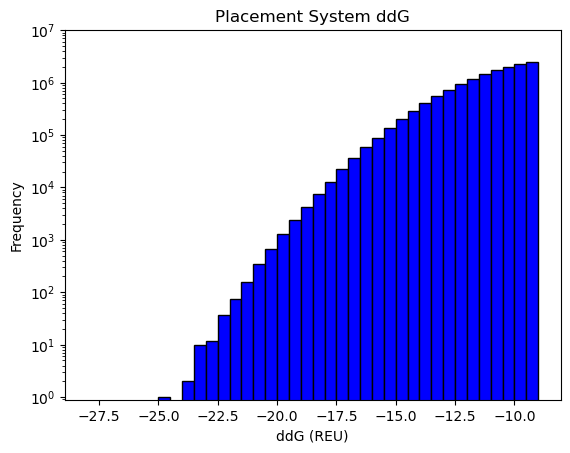

In [8]:
#ddg
x = df['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement System ddG')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(-28, -8.5, 0.5)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, color='blue', align = 'mid', edgecolor='black')
#set grid
#plt.grid(True)
#show plot
plt.show()

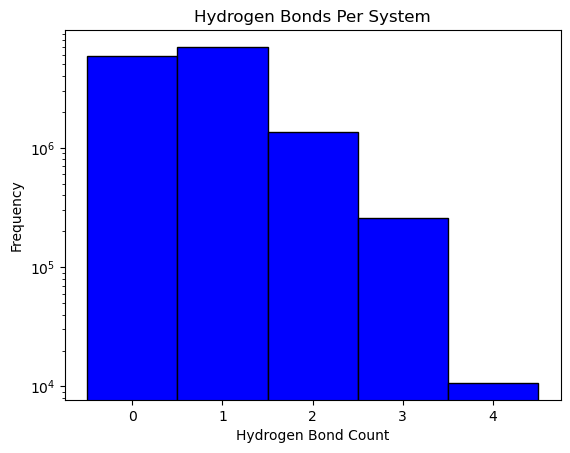

In [5]:
#hbond
x = df['hbond_motif_count']
#set labels and title
plt.xlabel('Hydrogen Bond Count')
plt.ylabel('Frequency')
plt.title('Hydrogen Bonds Per System')

bin_edges = np.arange(-0.5, 5, 1)

# Plot histogram
#plt.hist(x, bins=bin_edges, edgecolor='black')

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, color='blue', align='mid', width = 1, edgecolor='black')
#set grid
#plt.grid(True)

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

#show plot
plt.show()

/scratch/local/ipykernel_226169/1447882467.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


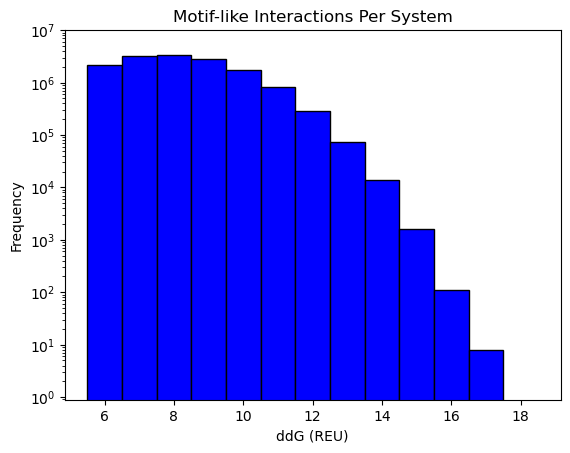

In [9]:
#motif-like interactions
x = df['total_motifs']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(5.5, 19, 1)

plt.ylim(0,10000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, color='blue', align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

/scratch/local/ipykernel_226169/2871376007.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000000)


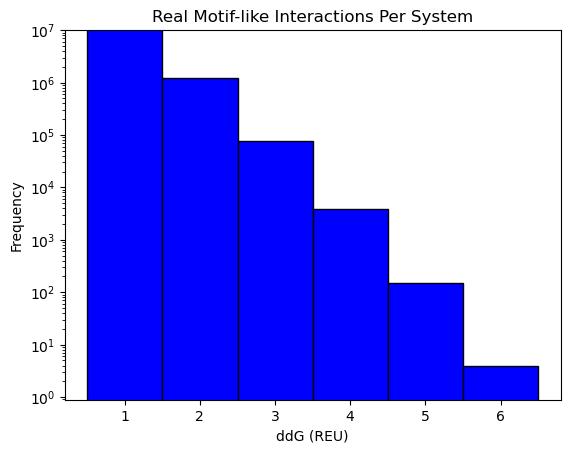

In [10]:
#real motif count
x = df['real_motif_ratio'] * df['total_motifs']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Real Motif-like Interactions Per System')

# Set y-axis to display in scientific notation with individual tick values
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_powerlimits((0,0))
# Set y-axis to display numbers with commas
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
#set y scale to log
plt.yscale('log')

bin_edges = np.arange(0.5, 7, 1)

plt.ylim(0,100000000)

#create 30 bin 1D hsitogram
plt.hist(x, bins=bin_edges, color='blue', align = 'mid', edgecolor='black' ,width = 1)
#set grid
#plt.grid(True)
#show plot
plt.show()

In [10]:
#make dataframe with only rosetta hbond count of 3
df_3_hbonds = df[df['hbond_motif_count'] >= 3]
df_3_hbonds = df_3_hbonds.sort_values(by='ddg')

In [11]:
df_3_hbonds

,file,ddg,total_motifs,significant_motifs,real_motif_ratio,hbond_motif_count,hbond_motif_energy_sum,closest_autodock_recovery_rmsd,closest_autodock_recovery_ddg,strain_energy,total
591605,/scratch/abgvg9/discovery_results/antagonists/10519/placements/4s0v_receptor_only_PV-006025420297_10_0.pdb,-22.912940,10.0,1.0,0.100000,3,-3.340291,100,0,0,87.846769
3026559,/scratch/abgvg9/discovery_results/antagonists/1467/placements/4s0v_receptor_only_Z2650638950_3_9.pdb,-22.561287,11.0,5.0,0.181818,3,-1.701871,100,0,0,94.918660
6200328,/scratch/abgvg9/discovery_results/antagonists/3643/placements/4s0v_receptor_only_PV-005249995096_11_0.pdb,-22.542003,12.0,6.0,0.083333,3,-1.894506,100,0,0,96.646824
3193681,/scratch/abgvg9/discovery_results/antagonists/1557/placements/4s0v_receptor_only_PV-003921628028_13_7.pdb,-22.261472,8.0,4.0,0.125000,3,-4.714554,100,0,0,88.148974
11793969,/scratch/abgvg9/discovery_results/antagonists/7824/placements/4s0v_receptor_only_PV-005046774983_3_4.pdb,-22.249342,10.0,6.0,0.200000,3,-2.815362,100,0,0,94.135296
...,...,...,...,...,...,...,...,...,...,...,...
2805786,/scratch/abgvg9/discovery_results/antagonists/1396/placements/4s0v_receptor_only_Z3861080439_10_0.pdb,-9.000068,7.0,1.0,0.142857,3,-1.525792,100,0,0,100.616997
4020620,/scratch/abgvg9/discovery_results/antagonists/2186/placements/4s0v_receptor_only_PV-003585390046_14_5.pdb,-9.000041,11.0,3.0,0.090909,3,-1.805830,100,0,0,106.285038
6005187,/scratch/abgvg9/discovery_results/antagonists/3498/placements/4s0v_receptor_only_PV-005072253249_7_0.pdb,-9.000022,8.0,3.0,0.125000,3,-1.402166,100,0,0,103.722812
4357811,/scratch/abgvg9/discovery_results/antagonists/2451/placements/4s0v_receptor_only_PV-006373997884_8_0.pdb,-9.000019,10.0,2.0,0.100000,3,-1.558998,100,0,0,104.540983


In [12]:
len(df_3_hbonds)

270619

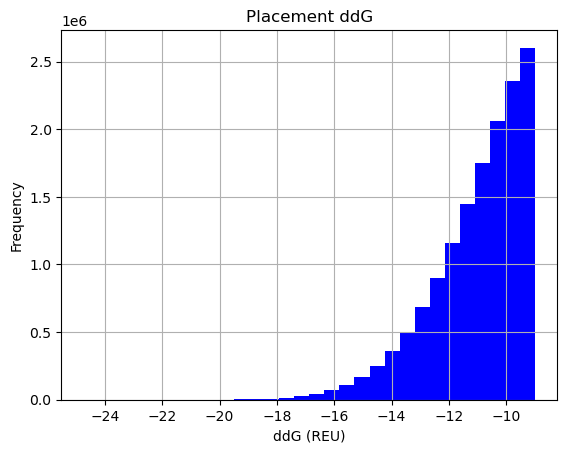

In [13]:
#ddg
x = df['ddg']
#set labels and title
plt.xlabel('ddG (REU)')
plt.ylabel('Frequency')
plt.title('Placement ddG')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [14]:
#make the low ddg dataframe and csv for antagonists
df_16 = df[df['ddg'] < -16]
df_16_real_quarter = df_16[df_16['real_motif_ratio'] >= 0.25]

In [15]:
len(df_16_real_quarter)

7669

In [16]:

df_16_real_quarter.to_csv('/scratch/abgvg9/discovery_results/antagonists/12M_-16_ddg_quarter_real.csv', index=False)

In [17]:
#make the half real motif dataframe and csv
#to be consistent with agonist set, no restriction on rosetta hbond count, since that was ultimately ditched
df_half_real = df[df['real_motif_ratio'] >= 0.5]

In [18]:
len(df_half_real)

7257

In [20]:
df_half_real.to_csv('/scratch/abgvg9/discovery_results/antagonists/12M_list_filtered_half_real_2_hbonds.csv', index=False)